# TP5 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images -- À la découverte des images RGB (Red Green Blue)

**But du TP** :
* manipuler les composantes Rouge, Vert et Bleu des images
* realisation de filtrages par canaux

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

Selecting previously unselected package tree.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 78 (delta 1), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (78/78), 4.11 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np

# Rehaussement par Laplacien

1. Charger l'image tp-m1-ts/tp5/peppers.png et afficher la.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/peppers.png?ref_type=heads)

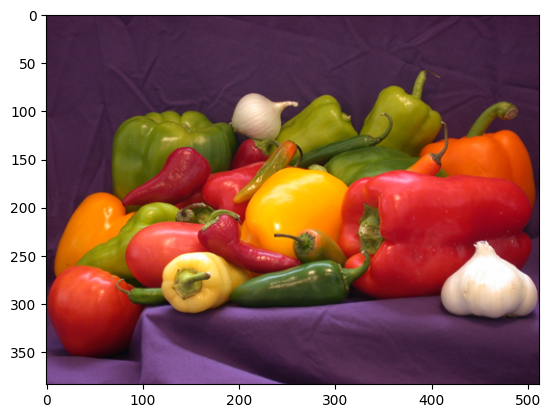

In [3]:
# A vous...
peppers = plt.imread('tp-m1-ts/tp5/peppers.png')
plt.imshow(peppers)

2. Créer le masque correspondant à l'opérateur Laplacien avec un centre négatif. Filtrer l'image en utilisant la fonction de le déconvolution [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) sur chaque composante de l'image. Afficher le résultat.

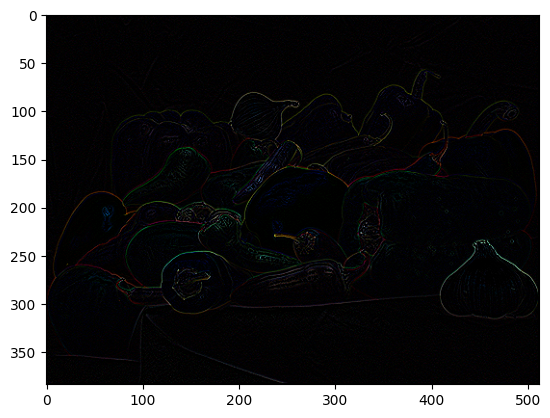

In [5]:
# A vous...
laplacian_masque = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
"""
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

filtered_red = scipy.signal.convolve2d(red_channel, mask, mode='same')
filtered_green = scipy.signal.convolve2d(green_channel, mask, mode='same')
filtered_blue = scipy.signal.convolve2d(blue_channel, mask, mode='same')

filtered_image = np.stack((filtered_red, filtered_green, filtered_blue), axis=2)
"""

image_filtree = np.zeros_like(peppers)
for i in range(peppers.shape[2]):
    image_filtree[:, :, i] = scipy.signal.convolve2d(peppers[:, :, i], laplacian_masque, mode='same')

plt.imshow(image_filtree)
plt.show()

3. À partir de l'image originale et l'image obtenue en 2), comment pouvons-nous obtenir une image rehaussée ? Appliquer cette méthode. Afficher le résultat et commenter.

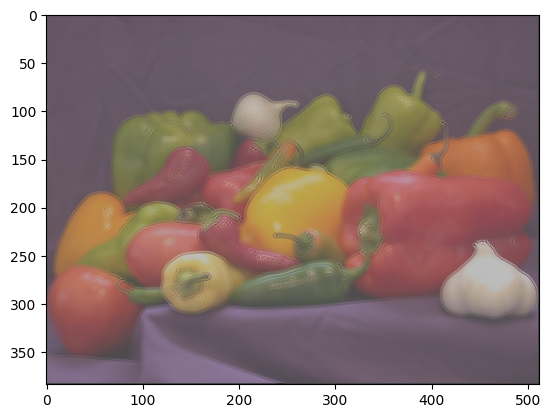

In [6]:
# A vous...
image_rehaussee = peppers + image_filtree
image_rehaussee = (image_rehaussee - np.min(image_rehaussee)) / (np.max(image_rehaussee) - np.min(image_rehaussee)) * 255
image_rehaussee = image_rehaussee.astype(np.uint8)

# Affichage du résultat
plt.imshow(image_rehaussee)
plt.show()

Vos commentaires...
1. Appliquer le filtre Laplacien sur l'image originale pour obtenir l'image des bords.\\
2. Ajouter l'image des bords à l'image originale pour obtenir une image rehaussée.
3. Normaliser l'image rehaussée pour que les valeurs soient comprises entre 0 et 255.

Le rehaussement de l'image permet de mettre en valeur les détails de l'image et d'améliorer le contraste.

# Manipulation des composantes RGB

1. Affichage des composantes de l'image de la voiture : tp-m1-ts/tp5/2cv.jpg

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/2cv.jpg?ref_type=heads)

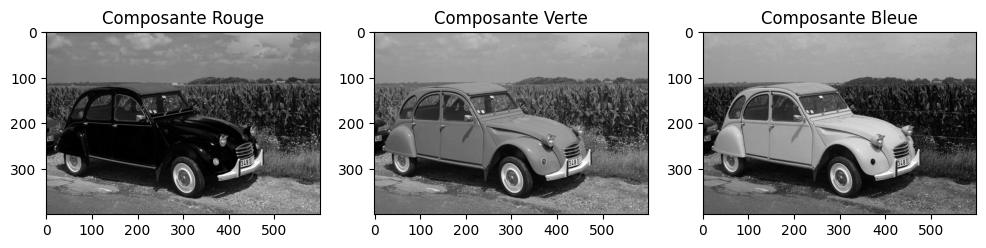

In [10]:
# A vous...
img2cv = plt.imread('tp-m1-ts/tp5/2cv.jpg')

# Affichage des composantes de l'image
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(img2cv[:, :, 0], cmap='gray')
plt.title('Composante Rouge')

plt.subplot(132)
plt.imshow(img2cv[:, :, 1], cmap='gray')
plt.title('Composante Verte')

plt.subplot(133)
plt.imshow(img2cv[:, :, 2], cmap='gray')
plt.title('Composante Bleue')

plt.show()

a. Construire l'image en intensité de la composante bleue uniquement. Pour cela :
* créer une image img_bleue de la même taille que img et contenant que des 0,
* copier les valeurs de la composante bleue de img dans img_bleue,
* afficher l'image : que remarquez-vous ?
![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_5.png?ref_type=heads)

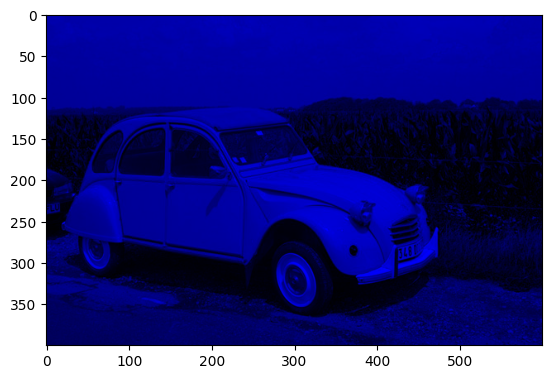

In [12]:
# A vous...
img_bleue = np.zeros_like(img2cv)
img_bleue[:, :, 2] = img2cv[:, :, 2]

plt.imshow(img_bleue)
plt.show()

b. Construire de même l'image de la composante verte et l'image de la composante rouge.


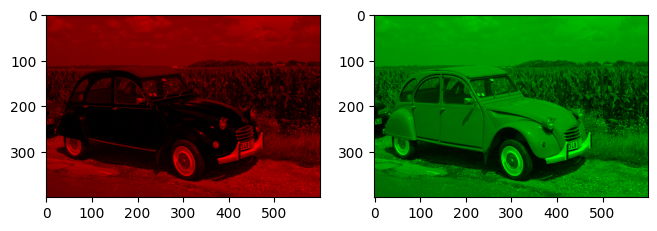

In [13]:
# A vous...
img_rouge = np.zeros_like(img2cv)
img_verte = np.zeros_like(img2cv)
img_rouge[:, :, 0] = img2cv[:, :, 0]
img_verte[:, :, 1] = img2cv[:, :, 1]

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img_rouge)
plt.subplot(132)
plt.imshow(img_verte)
plt.show()


c. Commenter l'évolution de l'intensité des pixels correspondant à la carrosserie de la voiture.

*Vos commentaires...*

On vois une forte intensité pour les canaux Verte et Bleue

2. Filtrage en fonction des composantes

a. Construire l'image filtrée où ne sont retenus que les pixels dont l'intensité en bleu est supérieure à un seuil donné :

       dimensions=np.shape(img)
       seuil = 200
       masque = (img[:,:,2]> seuil)
       imgf = np.zeros(dimensions,dtype=np.uint8)
       imgf[masque,0] = img[masque,0]
       imgf[masque,1] = img[masque,1]
       imgf[masque,2] = img[masque,2]

Donner une valeur de la variable seuil sur la composante bleue qui permet d'obtenir la carrosserie complète de la voiture tout en éliminant un maximum des autres pixels de l'image. Identifier les principales zones ayant été retenues après filtrage et expliquer la raison de leur présence à l'image.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_8.png?ref_type=heads)

b. Sur le même principe, proposer un seuillage sur la composante rouge pour essayer de conserver l'intégralité de la carrosserie de la voiture tout en éliminant un maximum de pixels. Produire le même type d'analyse que pour le résultat précédent.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_9.png?ref_type=heads)

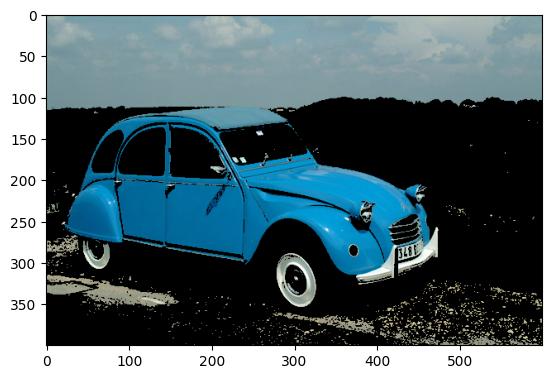

In [14]:
# A vous...
dimensions=np.shape(img2cv)
seuil = 120
masque = (img2cv[:,:,2]> seuil)
imgf = np.zeros(dimensions,dtype=np.uint8)
imgf[masque,0] = img2cv[masque,0]
imgf[masque,1] = img2cv[masque,1]
imgf[masque,2] = img2cv[masque,2]

plt.imshow(imgf)
plt.show()

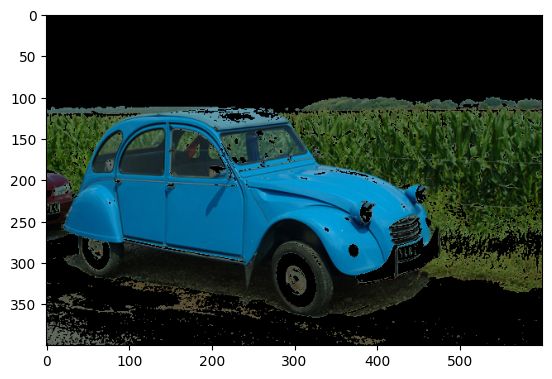

In [15]:
dimensions=np.shape(img2cv)
seuil = 100
masque = (img2cv[:,:,0]< seuil)
imgf = np.zeros(dimensions,dtype=np.uint8)
imgf[masque,0] = img2cv[masque,0]
imgf[masque,1] = img2cv[masque,1]
imgf[masque,2] = img2cv[masque,2]

plt.imshow(imgf)
plt.show()

c. Proposer une combinaison des deux seuils précédents (sur la composante bleue et sur la composante rouge) pour cerner au mieux la carrosserie. Les seuils permettent ici de déterminer une région de l'image. Nous avons « masqué » les pixels n'appartenant pas à la voiture. D'une manière générale, en traitement d'image, un « masque » désigne une image qui identifie un sous- ensemble des pixels d'une image de départ.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_10.png?ref_type=heads)

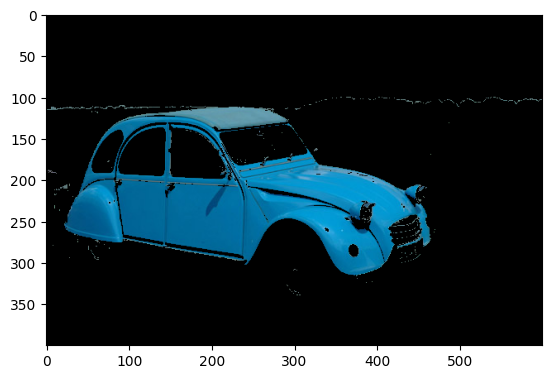

In [16]:
# A vous...
dimensions=np.shape(img2cv)
seuil_rouge = 110
seuil_bleu = 110
masque_rouge = (img2cv[:,:,0]< seuil_rouge)
masque_bleu = (img2cv[:,:,2]> seuil_bleu)

masque = masque_bleu & masque_rouge

imgf = np.zeros(dimensions,dtype=np.uint8)
imgf[masque,0] = img2cv[masque,0]
imgf[masque,1] = img2cv[masque,1]
imgf[masque,2] = img2cv[masque,2]

plt.imshow(imgf)
plt.show()


d. À l'aide de ces informations, intervertissez les valeurs des composantes verte et bleue pour transformer la couleur de la voiture.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_11.png?ref_type=heads)

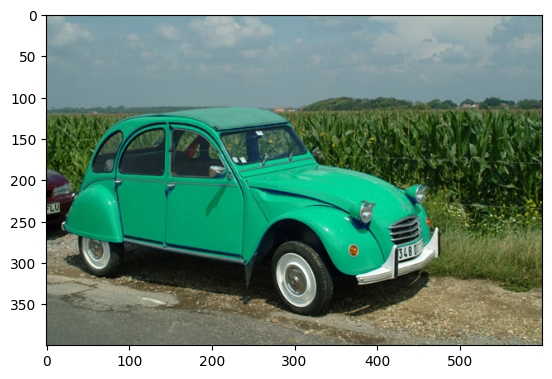

In [17]:
# A vous...
dimensions=np.shape(img2cv)
seuil_rouge = 110
seuil_bleu = 110
masque_rouge = (img2cv[:,:,0]< seuil_rouge)
masque_bleu = (img2cv[:,:,2]> seuil_bleu)

masque = masque_bleu & masque_rouge

img_inverse = img2cv.copy()
img_inverse[masque, 1] = img2cv[masque, 2]
img_inverse[masque, 2] = img2cv[masque, 1]

plt.imshow(img_inverse)
plt.show()

#Conversion d’image

1. Image en niveaux de gris et image binaire

a. Convertir l'image de départ en niveaux de gris et afficher le résultat obtenu, en utilisant la palette graphique composée de 256 niveaux de gris.

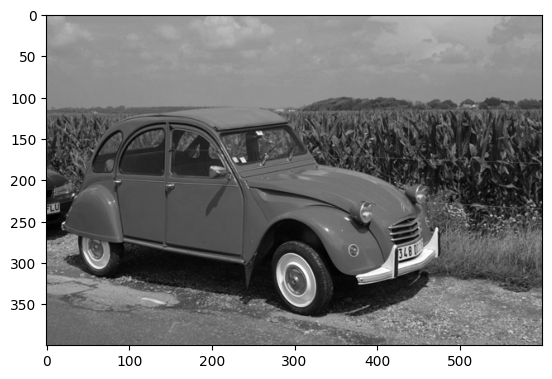

In [18]:
# A vous...
def rgb2gray(img):
    # 0.299 * Red + 0.587 * Green + 0.114 * Blue
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    img_gris = 0.299*r + 0.587*g + 0.114*b
    return img_gris.astype(np.uint8)

img_gris = rgb2gray(img2cv)
plt.imshow(img_gris, cmap='gray')
plt.show()


b. Binariser l'image en niveaux de gris avec le seuil par défaut(128). Afficher les résultats obtenus.

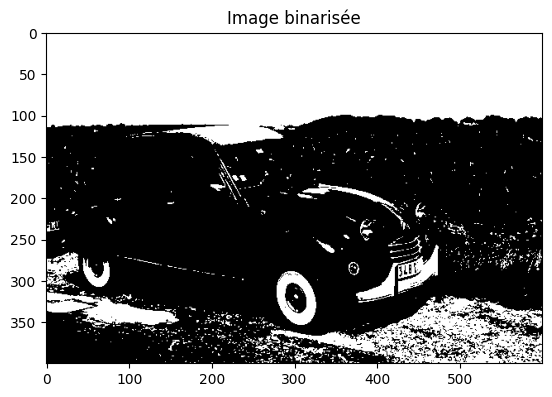

In [19]:
# A vous...
def binariser_image(img_gris, seuil=128):
    img_binaire = np.where(img_gris >= seuil, 255, 0)  # 255 pour blanc, 0 pour noir
    return img_binaire.astype(np.uint8)

img_binaire = binariser_image(img_gris, 128)

plt.imshow(img_binaire, cmap='gray')
plt.title('Image binarisée')
plt.show()

2. Histogramme

a. Calculer l'histogramme de l'image en niveaux de gris.Afficher le résultat.

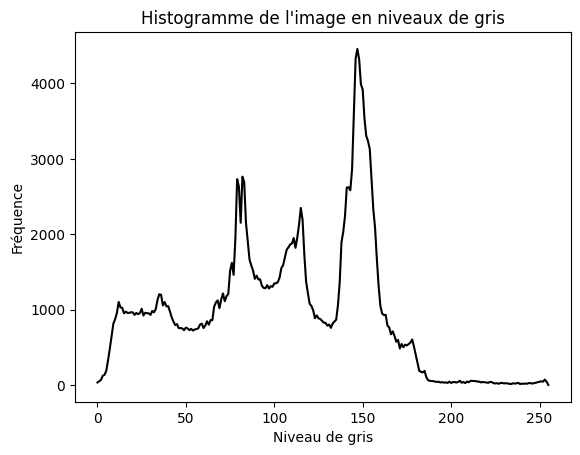

In [20]:
# A vous...
histogramme, bins = np.histogram(img_gris, bins=256, range=(0, 256))

# Affichage de l'histogramme
plt.plot(histogramme, color='black')
plt.title('Histogramme de l\'image en niveaux de gris')
plt.xlabel('Niveau de gris')
plt.ylabel('Fréquence')
plt.show()

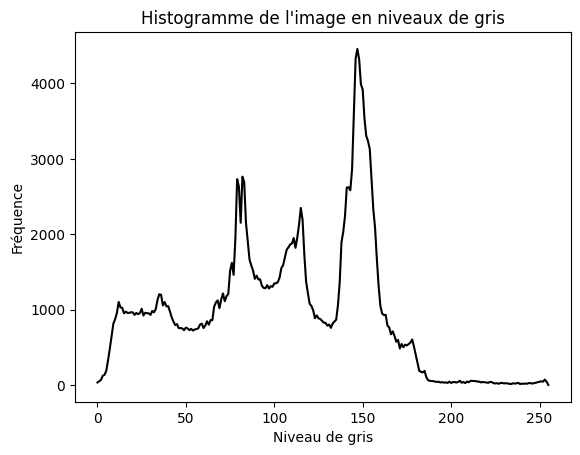

In [21]:
def myHistogramme(img_gris):
  hist = np.zeros(256)
  for p in img_gris.flatten():
    hist[p] += 1

  return hist

histo = myHistogramme(img_gris)
plt.plot(histo, color='black')
plt.title('Histogramme de l\'image en niveaux de gris')
plt.xlabel('Niveau de gris')
plt.ylabel('Fréquence')
plt.show()

b. À l'aide de l'histogramme, est-il possible de binariser l'image en niveaux de gris de manière plus intelligente (afin que l'image binaire soit plus lisible) ?

99


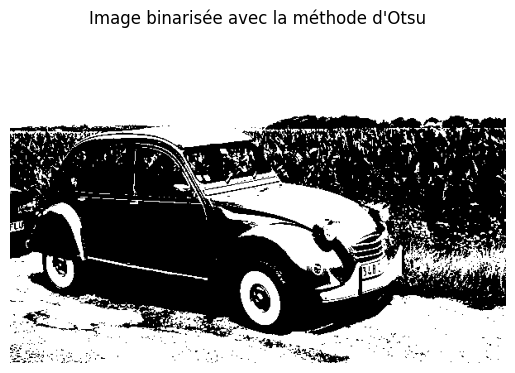

In [22]:
# A vous...
#otsu
def otsu_binarization(img_gris):
    # Calcul de l'histogramme
    hist, bins = np.histogram(img_gris, bins=256, range=(0, 256))

    # Normalisation de l'histogramme
    hist_norm = hist / float(np.sum(hist))

    # Initialisation des variables
    var_max = 0
    seuil_optimal = 0

    # Calcul de la variance entre classes pour chaque seuil possible
    for seuil in range(1, 256):
        classe_bg = hist_norm[:seuil]
        classe_fg = hist_norm[seuil:]

        poids_bg = np.sum(classe_bg)
        poids_fg = np.sum(classe_fg)

        if poids_bg == 0 or poids_fg == 0:
            continue

        moyenne_bg = np.sum(np.arange(seuil) * classe_bg) / poids_bg
        moyenne_fg = np.sum(np.arange(seuil, 256) * classe_fg) / poids_fg

        variance_interclasse = poids_bg * poids_fg * (moyenne_bg - moyenne_fg) ** 2

        if variance_interclasse > var_max:
            var_max = variance_interclasse
            seuil_optimal = seuil

    # Binarisation de l'image en utilisant le seuil optimal
    img_binarisee = np.where(img_gris >= seuil_optimal, 255, 0).astype(np.uint8)
    print(seuil_optimal)
    return img_binarisee

# Test de la fonction sur une image en niveaux de gris
img_binarisee_otsu = otsu_binarization(img_gris)

# Affichage de l'image binarisée avec la méthode d'Otsu
plt.imshow(img_binarisee_otsu, cmap='gray')
plt.title('Image binarisée avec la méthode d\'Otsu')
plt.axis('off')
plt.show()


Calcul de l'histogramme: Tout d'abord, l'histogramme de l'image en niveaux de gris est calculé. L'histogramme représente la distribution des niveaux de gris dans l'image, c'est-à-dire le nombre de pixels ayant chaque valeur de gris.

Normalisation de l'histogramme: L'histogramme est normalisé en divisant chaque valeur par le nombre total de pixels de l'image. Cela permet d'obtenir une distribution de probabilité des niveaux de gris.

Recherche du seuil optimal: Ensuite, pour chaque valeur de seuil possible entre 0 et 255, la méthode d'Otsu calcule la variance interclasse. La variance interclasse mesure la séparation entre les deux classes de pixels (les pixels noirs et les pixels blancs) après seuillage. Plus la variance interclasse est grande, plus les classes sont séparées.

Sélection du seuil optimal: Le seuil optimal est choisi comme celui qui maximise la variance interclasse. Cela signifie que le seuil choisi minimise la variance intraclasse (variance à l'intérieur de chaque classe) et maximise la variance interclasse.

Binarisation de l'image: Enfin, l'image est binarisée en utilisant le seuil optimal. Tous les pixels dont la valeur est supérieure ou égale au seuil sont assignés à la classe des pixels blancs (généralement avec une valeur de 255), tandis que les pixels en dessous du seuil sont assignés à la classe des pixels noirs (généralement avec une valeur de 0).

En résumé, la méthode d'Otsu permet de déterminer automatiquement le seuil de binarisation optimal en exploitant les propriétés statistiques de l'histogramme de l'image en niveaux de gris, ce qui conduit généralement à une binarisation plus précise et plus robuste.

# Egalisation de Histogramme pour la contraste

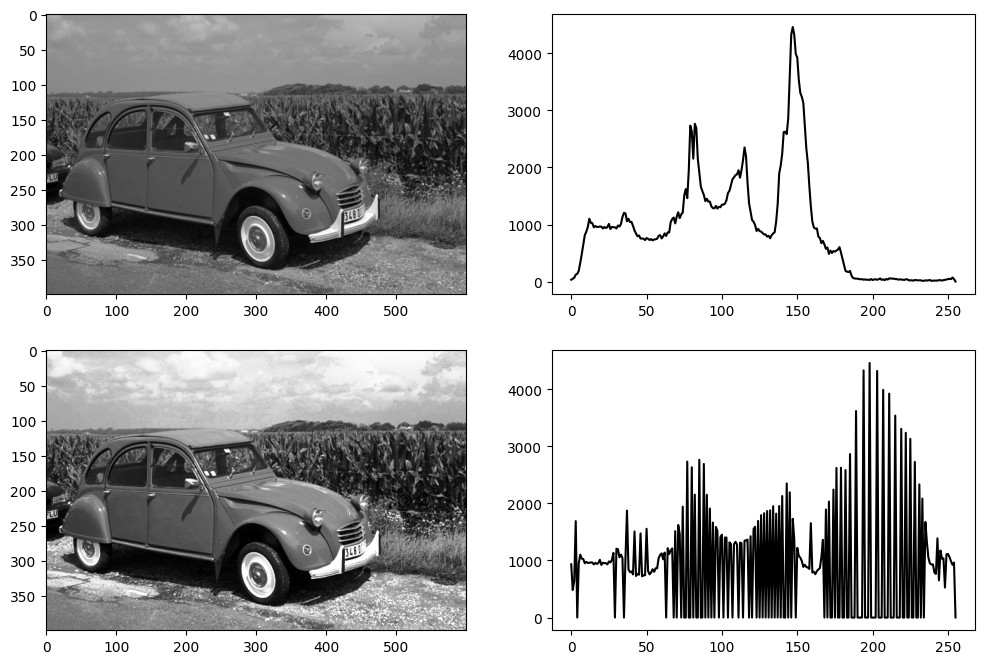

In [43]:

def histogram_equalization(img_gris):
    mI = np.min(img_gris)
    MI = np.max(img_gris)

    # Calcul de l'histogramme cumulatif de l'image originale
    hist, bins = np.histogram(img_gris.flatten(), 256, [0, 256])
    cdf = hist.cumsum()

    # Calcul de la transformation d'égalisation
    cdf_normalized = cdf * 255 / cdf[-1]
    im_egal = np.interp(img_gris.flatten(), bins[:-1], cdf_normalized).reshape(img_gris.shape)

    return im_egal.astype(np.uint8)

histo = myHistogramme(img_gris)

img_egalisee = histogram_equalization(img_gris)
histo2 = myHistogramme(img_egalisee)

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(img_gris, cmap='gray')
plt.subplot(222)
plt.plot(histo, color='black')
plt.subplot(223)
plt.imshow(img_egalisee, cmap='gray')
plt.subplot(224)
plt.plot(histo2, color='black')
plt.show()

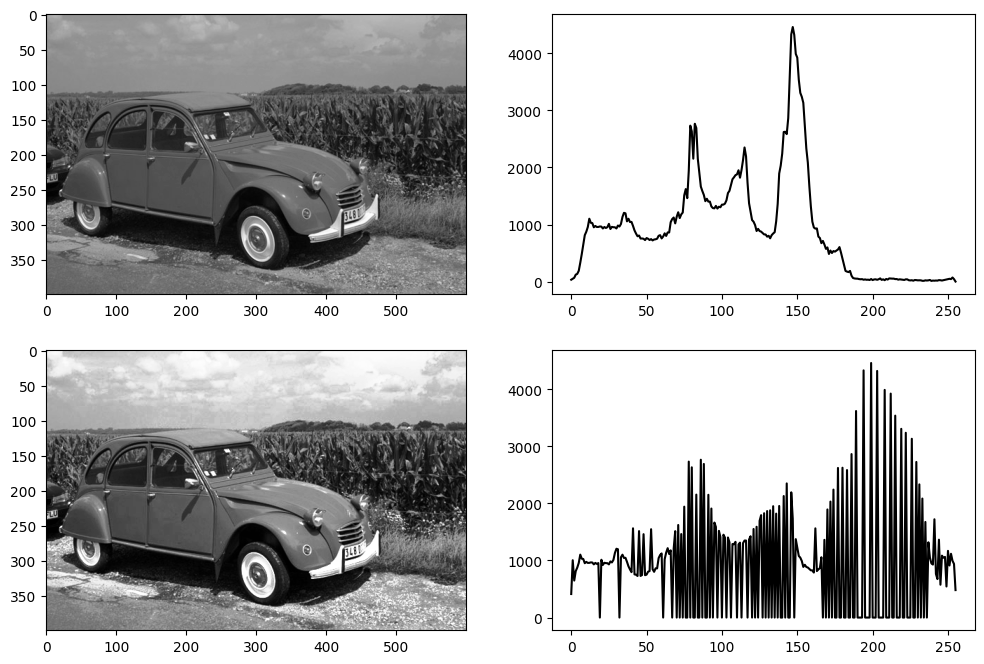

In [38]:
import cv2

histo = myHistogramme(img_gris)

img_egalisee = cv2.equalizeHist(img_gris)
histo2 = myHistogramme(img_egalisee)

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(img_gris, cmap='gray')
plt.subplot(222)
plt.plot(histo, color='black')
plt.subplot(223)
plt.imshow(img_egalisee, cmap='gray')
plt.subplot(224)
plt.plot(histo2, color='black')
plt.show()